In [25]:
from astropy.io import fits                                      
import numpy as np

#converting fits file to txt file
x1ddata = fits.getdata('lbji01010_x1dsum.fits')
wavelength = np.concatenate((x1ddata["wavelength"][1],\
              x1ddata["wavelength"][0]))
flux = np.concatenate((x1ddata["flux"][1], x1ddata["flux"][0]))
err = np.concatenate((x1ddata["error"][1], x1ddata["error"][0]))
dq_wgt = np.concatenate((x1ddata["dq_wgt"][1], \
         x1ddata["dq_wgt"][0]))
with open('data.txt','w') as f:
    for row in zip(wavelength, flux, err, dq_wgt):
        f.write('{}\t{}\t{}\t{}\n'.format(row[0], row[1], row[2], row[3]))


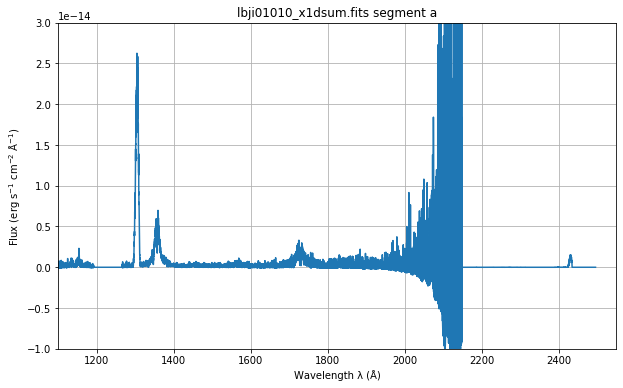

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits                                      
import numpy as np
from numpy import *

#x1dsum plot using text file

#data
data = loadtxt('lbji01010_x1dsum.txt')
x = data[:,0]
y = data[:,1]

#plot data
plt.figure(figsize=(10,6))
plt.plot(x,y)

#making plot pretty
plt.xlim(1100,2550)
plt.ylim(-1.0e-14,3e-14)
plt.title('lbji01010_x1dsum.fits segment a')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')

plt.grid()
plt.show()

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


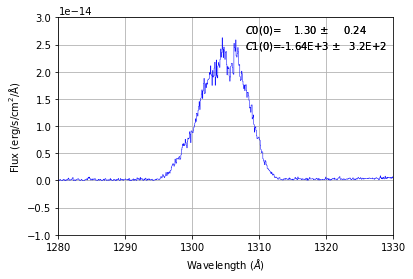

In [3]:
import pyspeckit 
import numpy as np
from numpy import *

#POLYNOMIAL CONTINUUM FITTING

# plotting data
data = 'lbji01010_x1dsum.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1280, xmax = 1330, ymin = -1e-14,\
           ymax = 3e-14, color = 'b')
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp.plotter.refresh()

#continuum fit
sp.specfit.Registry.add_fitter('polycontinuum',
                               pyspeckit.models.polynomial_continuum.poly_fitter(),
                               2)
sp.specfit(fittype='polycontinuum', guesses=(0,0),exclude=[1290,1310])

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  3.77794e-15 +/-     5.83521e-16 
Param #1       SHIFT0 =       1299.2 +/-        0.381924 
Param #2       WIDTH0 =      1.85157 +/-         0.18741   Range:   [0,inf)
Param #3   AMPLITUDE1 =  6.96087e-13 +/-      1.4758e-09 
Param #4       SHIFT1 =      1304.56 +/-          1.5657 
Param #5       WIDTH1 =     0.714989 +/-         8.78354   Range:   [0,inf)
Param #6   AMPLITUDE2 =  2.91764e-14 +/-     1.64935e-15 
Param #7       SHIFT2 =      1304.89 +/-        0.106848 
Param #8       WIDTH2 =      2.74578 +/-       0.0586775   Range:   [0,inf)
Param #9   AMPLITUDE3 =  2.33231e-15 +/-     6.35088e-16 
Param #10       SHIFT3 =      1309.18 +/-        0.299352 
Param #11       WIDTH3 =      1.01104 +/-         0.25746   Range:   [0,inf)
Param #12   AMPLITUDE4 = -7.00772e-13 +/-      1.4758e-09 
Param #13       SHIFT4 =      1304.56 +/-         1.60495 
Param 

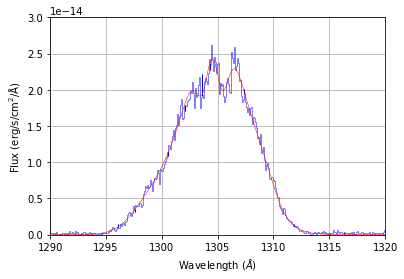

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pyspeckit 
import numpy as np

#GAUSSIAN FITTING

# plotting data
data = 'lbji01010_x1dsum.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1290, xmax = 1320,ymax = 3e-14, color = 'b')
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian')

#fitting with my own guesses
sp.specfit(fittype='gaussian',
           guesses = [2.4e-14,1304,10,1.1e-14,1305,13,\
                      2.5e-14,1304,1,\
                      2.4e-14,1308, 1,\
                      -1.75e-14,1305,1],annotate = False)

print(sp.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  3.77794e-15 +/-     5.83521e-16 
Param #1       SHIFT0 =       1299.2 +/-        0.381924 
Param #2       WIDTH0 =      1.85157 +/-         0.18741   Range:   [0,inf)
Param #3   AMPLITUDE1 =  6.96087e-13 +/-      1.4758e-09 
Param #4       SHIFT1 =      1304.56 +/-          1.5657 
Param #5       WIDTH1 =     0.714989 +/-         8.78354   Range:   [0,inf)
Param #6   AMPLITUDE2 =  2.91764e-14 +/-     1.64935e-15 
Param #7       SHIFT2 =      1304.89 +/-        0.106848 
Param #8       WIDTH2 =      2.74578 +/-       0.0586775   Range:   [0,inf)
Param #9   AMPLITUDE3 =  2.33231e-15 +/-     6.35088e-16 
Param #10       SHIFT3 =      1309.18 +/-        0.299352 
Param #11       WIDTH3 =      1.01104 +/-         0.25746   Range:   [0,inf)
Param #12   AMPLITUDE4 = -7.00772e-13 +/-      1.4758e-09 
Param #13       SHIFT4 =      1304.56 +/-         1.60495 
Param 

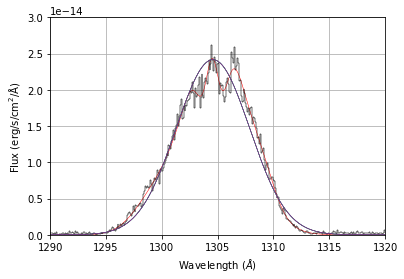

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyspeckit 
import numpy as np

#GAUSSIAN FITTING

# plotting data
data = 'lbji01010_x1dsum.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1290, xmax = 1320,ymin = 0, 
           ymax = 3e-14,linewidth = 0.1)
plt.grid()

#Overall Guassian
sp.specfit(fittype='gaussian',
           guesses = [2.4e-14,1304,10,1.1e-14,1305,13,\
                      2.5e-14,1304,1,\
                      2.4e-14,1308, 1,\
                      -1.75e-14,1305,1],annotate = False)

#Plotting Individual Gaussians

# Gaussian 1
sp2 = pyspeckit.Spectrum(data)
sp2.plotter(axis=sp.plotter.axis,xmin = 1290, xmax = 1320,\
            ymin = 0, ymax = 3e-14,
            clear=False, linewidth = 0.1)
sp2.specfit(fittype='gaussian', guesses = [3.77794e-15,1299.2,1.85157], 
            annotate = False, color ='b')

#Gaussian 2
sp3 = pyspeckit.Spectrum(data)
sp3.plotter(axis=sp.plotter.axis,xmin = 1290, xmax = 1320,\
            ymin = 0, ymax = 3e-14,
            clear=False, linewidth = 0.1)
sp3.specfit(fittype='gaussian', guesses = [6.96087e-13,1304.56,0.714989], 
            annotate = False, color ='y')

#Gaussian 3
sp4 = pyspeckit.Spectrum(data)
sp4.plotter(axis=sp.plotter.axis,xmin = 1290, xmax = 1320,\
            ymin = 0, ymax = 3e-14,
            clear=False, linewidth = 0.1)
sp4.specfit(fittype='gaussian', guesses = [2.917e-14,1304.89,2.74578], 
            annotate = False, color ='c')

#Gaussian 4
sp5 = pyspeckit.Spectrum(data, unit=r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
sp5.plotter(axis=sp.plotter.axis,xmin = 1290, xmax = 1320,\
            ymin = 0, ymax = 3e-14,
            clear=False, linewidth = 0.1)
sp5.specfit(fittype='gaussian', guesses = [2.33e-15,1309.18,1.011], 
            annotate = False, color ='g')

#Gaussian 5
sp6 = pyspeckit.Spectrum(data, unit=r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
sp6.plotter(axis=sp.plotter.axis,xmin = 1290, xmax = 1320,\
            ymin = 0, ymax = 3e-14,
            clear=False, linewidth = 0.1)
sp6.specfit(fittype='gaussian', guesses = [-7.00e-13,1304.56,0.723], 
            annotate = False, color ='m')

#plotting axes labels and parameter info
sp6.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp6.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
print(sp.specfit.parinfo)
print('guesses = [-7.00e-13,1304.56,0.723]\n',sp6.specfit.parinfo)

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10


[[ -28.00517919    0.            0.            0.        ]
 [ -27.9262497     0.            0.            0.        ]
 [ -27.8473202     0.            0.            0.        ]
 ...
 [2495.98208416    0.            0.            0.        ]
 [2496.06210975    0.            0.            0.        ]
 [2496.14213533    0.            0.            0.        ]]
[       nan        nan        nan ... 3.39724146 3.39725539 3.39726931]


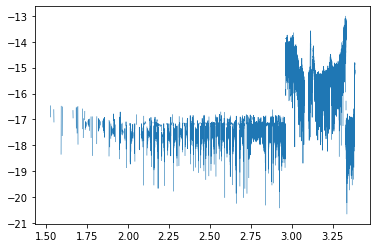

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyspeckit 
import numpy as np
from numpy import *

#GAUSSIAN FITTING
#plotting loglog to exaggerate the individual guassians

# loading data
data = loadtxt('lbji01010_x1dsum.txt')
x = data[:,0]
y = data[:,1]

#taking log of each column
xlog = log10(x)
ylog = log10(y)

#plotting
plt.plot(xlog,ylog, linewidth = 0.6)
print(data)
print(xlog)
#plt.xlim(3,4)
plt.show()

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


INFO: Renormalizing data by factor 4.181068e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  4.16275e-16 +/-     1.29109e-16 
Param #1       SHIFT0 =      1366.13 +/-        0.881523 
Param #2       WIDTH0 =      2.08939 +/-        0.749154   Range:   [0,inf)
Param #3   AMPLITUDE1 = -5.14962e-15 +/-     2.76626e-16 
Param #4       SHIFT1 =       1356.8 +/-        0.038616 
Param #5       WIDTH1 =      1.06007 +/-       0.0610617   Range:   [0,inf)
Param #6   AMPLITUDE2 =  6.01588e-15 +/-     2.40111e-16 
Param #7       SHIFT2 =      1357.06 +/-        0.110354 
Param #8       WIDTH2 =      4.13853 +/-        0.219334   Range:   [0,inf)
Param #9   AMPLITUDE3 =   3.8251e-15 +/-     1.33907e-10 
Param #10       SHIFT3 =     -5014.93 +/-     1.56874e+08 
Param #11       WIDTH3 =      3768.27 +/-     4.64699e+07   Range:   [0,inf)


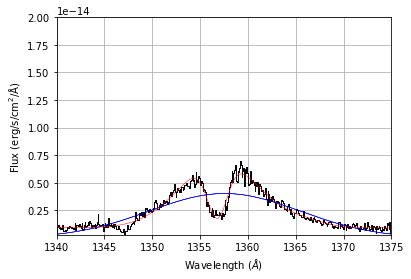

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import pyspeckit
from numpy import *
import numpy as np

#GAUSSIAN FITTING (of next emission line)

#plotting data
data = 'lbji01010_x1dsum.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1340, xmax = 1375,\
           ymax = 2.0e-14, color = 'b')
plt.grid()
sp.plotter.refresh()

#Fitting with overall gaussian 0 {amplitude center and width}
sp.specfit(fittype='gaussian',
           guesses = [6e-15,1357,8,-2.5e-15,1357,3,5e-15,1353, 5,6e-15,1358, 10])

#overlaying individual gaussians

#Guassian 1
sp2 = pyspeckit.Spectrum(data)
sp2.plotter(axis=sp.plotter.axis,xmin = 1340, xmax = 1375,\
            ymin = 0, ymax = 2.0e-14,
            clear=False)
sp2.specfit(fittype='gaussian', guesses = [4.16e-16,1366,2.089], annotate = False, color = 'b')

sp.specfit.plot_fit(annotate = False)

#Gaussian 2
sp3 = pyspeckit.Spectrum(data)
sp3.plotter(axis=sp.plotter.axis,xmin = 1340, xmax = 1375,\
            ymin = 0, ymax = 2.0e-14,
            clear=False)
sp3.specfit(fittype='gaussian', guesses = [-5.1496e-15,1356.8,1.06007], annotate = False, color ='b')

#Gaussian 3
sp4 = pyspeckit.Spectrum(data)
sp4.plotter(axis=sp.plotter.axis,xmin = 1340, xmax = 1375,\
            ymin = 0, ymax = 2.0e-14,
            clear=False)
sp4.specfit(fittype='gaussian', guesses = [6.0159e-15,1357.06,4.138], annotate = False, color ='b')

#Gaussian 4
sp5 = pyspeckit.Spectrum(data)
sp5.plotter(axis=sp.plotter.axis,xmin = 1340, xmax = 1375,\
            ymin = 0, ymax = 2.0e-14,
            clear=False)
sp5.specfit(fittype='gaussian', guesses = [3.8251e-15,-5014.39,3768.27], annotate = False, color ='b')

#Overall Guassian fit comprised of the above gaussians
sp.specfit(fittype='gaussian',
           guesses = [6e-15,1357,8,-2.5e-15,1357,3,5e-15,1353,\
                      5,6e-15,1358, 10],\
           annotate = False)

#plotting axes labels and parameter info
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
print(sp.specfit.parinfo)